In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

import statsmodels.api as sm

from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Parte II
Suponga que tenemos una empresa, cuya área de marketing, desea generar una clusterización para poder tener mayor éxito con sus campañas. Para esto nos entrego una base de datos (llamada evaluación_mkt_campaign.csv) que contiene los siguientes campos:
1. ID: Identificador único de cliente
2. Age: Edad del cliente
3. Seniority: Días desde el enrolamiento del cliente
4. Children: Numero hijos
5. Ingreso: Ingreso anual del cliente
6. Recency: Días desde la ́ultima compra del cliente
7. MntWines: Gasto en vino en los últimos 2 años
8. MntFruits: Gasto en fruta en los últimos 2 años
9. MntMeatProducts: Gasto en carne en los últimos 2 años
10. MntFishProducts: Gasto en pescado en los últimos 2 años
11. MntSweetProducts: Gasto en dulces en los últimos 2 años
12. MntGoldProds: Gasto en oro en los últimos 2 años
13. NumDealsPurchases: Numero de compras realizada bajo descuento
14. NumWebPurchases: Numero de compras realizadas por la web
15. NumCatalogPurchases: Numero de compras realizadas por catálogo
16. NumStorePurchases: Numero de compras realizadas en la tienda
17. NumWebVisitsMonth: Numero de visitas a la pagina web

En base a estos datos, realice lo siguiente:
Búsqueda de Anomalías: Usando las columnas de comportamiento de compra, encuentre registros anómalos correspondientes al 5% de la muestra, y descártelos.

Feature Extraction: Usando los datos filtrados reduzca el numero de variables. Busque una representación que le permita explicar un 90% de la varianza original de los datos. Clustering:

a) Usando los resultados anteriores clusterice el comportamiento de sus clientes. El área de marketing solicitó que el número de clusters sea no mayor a 8. Encuentre el número óptimo de clusters considerando esa restricción

b) Reporte los centroides de cada cluster en términos de las variables originales. Interprete.

In [ ]:
# Configuración matplotlib
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

In [ ]:
data = pd.read_csv("/content/evaluacion_mkt_campaign.csv", sep = ",")

In [ ]:
data.describe()

,ID,Income,Recency,MntWines,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Seniority,Children
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,5588.353339,52247.251354,49.012635,305.091606,166.995939,37.637635,27.028881,43.965253,2.323556,4.085289,2.671029,5.800993,5.319043,46.179603,538.006318,0.947202
std,3249.376275,25173.076661,28.948352,337.327920,224.283273,54.752082,41.072046,51.815414,1.923716,2.740951,2.926734,3.250785,2.425359,11.985554,232.469034,0.749062
min,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,26.000000,0.000000
25%,2814.750000,35303.000000,24.000000,24.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,38.000000,366.000000,0.000000
50%,5458.500000,51381.500000,49.000000,174.500000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000,45.000000,539.000000,1.000000
75%,8421.750000,68522.000000,74.000000,505.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,56.000000,712.000000,1.000000
max,11191.000000,666666.000000,99.000000,1493.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,122.000000,1089.000000,3.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2216 entries, 0 to 2215
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Income               2216 non-null   float64
 2   Recency              2216 non-null   int64  
 3   MntWines             2216 non-null   int64  
 4   MntMeatProducts      2216 non-null   int64  
 5   MntFishProducts      2216 non-null   int64  
 6   MntSweetProducts     2216 non-null   int64  
 7   MntGoldProds         2216 non-null   int64  
 8   NumDealsPurchases    2216 non-null   int64  
 9   NumWebPurchases      2216 non-null   int64  
 10  NumCatalogPurchases  2216 non-null   int64  
 11  NumStorePurchases    2216 non-null   int64  
 12  NumWebVisitsMonth    2216 non-null   int64  
 13  Age                  2216 non-null   int64  
 14  Seniority            2216 non-null   int64  
 15  Children             2216 non-null   i

In [ ]:
data.isna().sum()

ID                     0
Income                 0
Recency                0
MntWines               0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
Age                    0
Seniority              0
Children               0
dtype: int64

In [ ]:
data.head()

,ID,Income,Recency,MntWines,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Seniority,Children
0,5524,58138.0,58,635,546,172,88,88,3,8,10,4,7,58,997,0
1,2174,46344.0,38,11,6,2,1,6,2,1,1,2,5,61,151,2
2,4141,71613.0,26,426,127,111,21,42,1,8,2,10,4,50,498,0
3,6182,26646.0,26,11,20,10,3,5,2,2,0,4,6,31,91,1
4,5324,58293.0,94,173,118,46,27,15,5,5,3,6,5,34,347,1


In [ ]:
data = data.drop(['ID'], axis = 1)

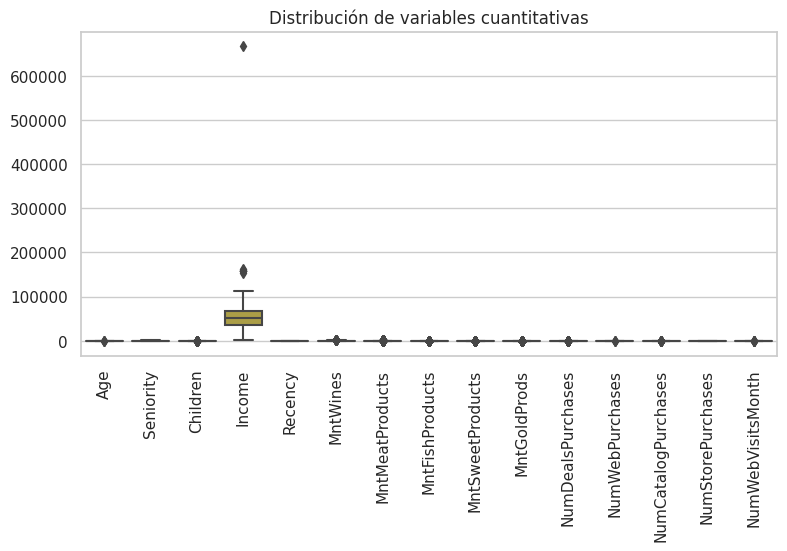

In [ ]:
sns.set(style='whitegrid')
plt.figure(figsize=(8, 4))

sns.boxplot(data=data[['Age', 'Seniority', 'Children', 'Income', 'Recency', 'MntWines', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']])
plt.xticks(rotation=90)
plt.title('Distribución de variables cuantitativas')
plt.show()

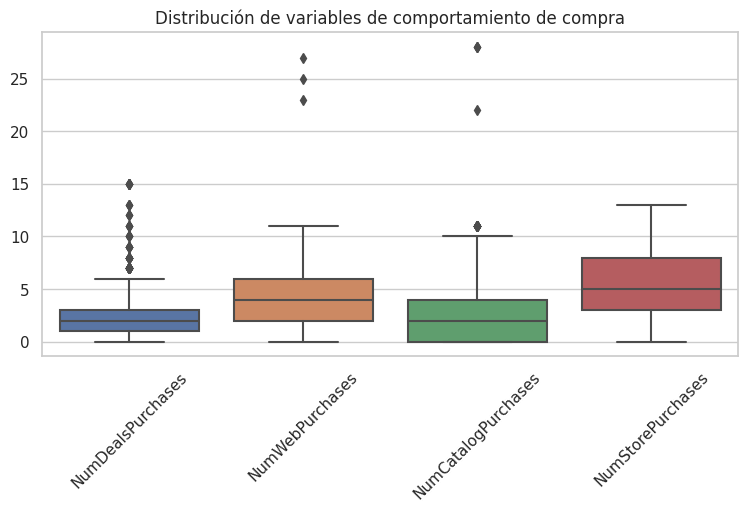

In [ ]:
sns.set(style='whitegrid')
plt.figure(figsize=(8, 4))

sns.boxplot(data=data[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']])
plt.xticks(rotation=45)
plt.title('Distribución de variables de comportamiento de compra')
plt.show()

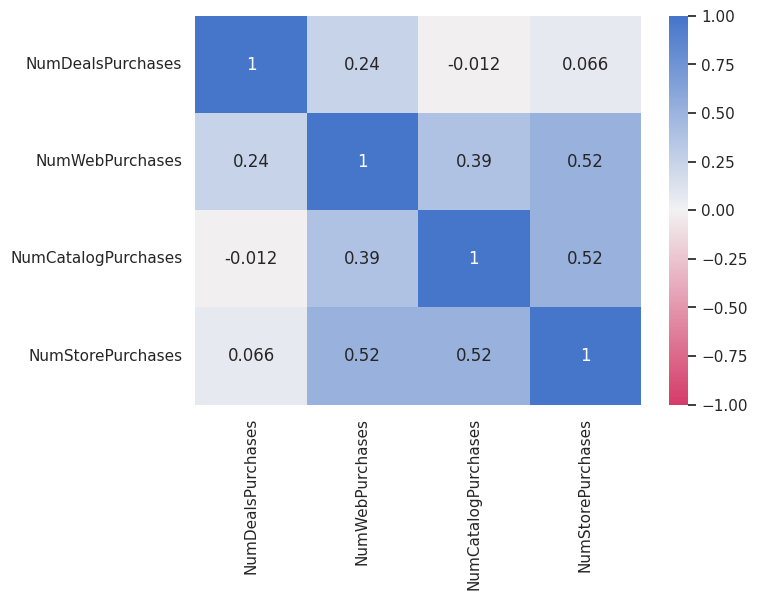

In [ ]:
corr_matrix = data[['NumDealsPurchases','NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].corr(method='pearson')

plt.figure()
sns.heatmap(corr_matrix,annot=True,linewidths=0,vmin=-1,vmax=1,cmap= sns.diverging_palette(0, 255, n=200));

In [ ]:
#valores del primer y tercer cuartil y el IQR de cada variable
q1 = data[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].quantile(0.25)
q3 = data[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].quantile(0.75)
iqr = q3 - q1

In [ ]:
#calculan los límites inferior y superior de Tukey para cada variable
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

In [ ]:
#filtramos datos que estan fuera del tukey
data_clean = data.loc[
    (data['NumDealsPurchases'] >= lower_bound['NumDealsPurchases']) & (data['NumDealsPurchases'] <= upper_bound['NumDealsPurchases']) &
    (data['NumWebPurchases'] >= lower_bound['NumWebPurchases']) & (data['NumWebPurchases'] <= upper_bound['NumWebPurchases']) &
    (data['NumCatalogPurchases'] >= lower_bound['NumCatalogPurchases']) & (data['NumCatalogPurchases'] <= upper_bound['NumCatalogPurchases']) &
    (data['NumStorePurchases'] >= lower_bound['NumStorePurchases']) & (data['NumStorePurchases'] <= upper_bound['NumStorePurchases'])
]

In [ ]:
n_rows = int(len(data_clean) * 0.05)
data_clean = data_clean.drop(data_clean.sample(n=n_rows, random_state=1).index)

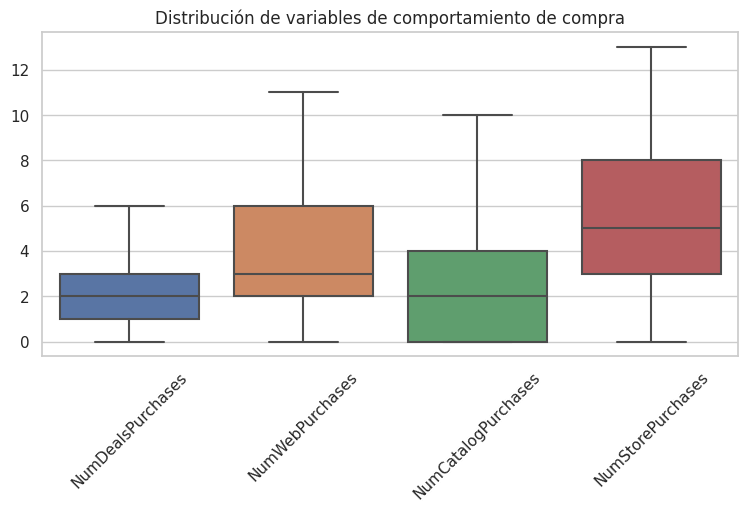

In [ ]:
sns.set(style='whitegrid')
plt.figure(figsize=(8, 4))

sns.boxplot(data=data_clean[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']])
plt.xticks(rotation=45)
plt.title('Distribución de variables de comportamiento de compra')
plt.show()

In [ ]:
data_clean

,Income,Recency,MntWines,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Seniority,Children
0,58138.0,58,635,546,172,88,88,3,8,10,4,7,58,997,0
1,46344.0,38,11,6,2,1,6,2,1,1,2,5,61,151,2
2,71613.0,26,426,127,111,21,42,1,8,2,10,4,50,498,0
3,26646.0,26,11,20,10,3,5,2,2,0,4,6,31,91,1
4,58293.0,94,173,118,46,27,15,5,5,3,6,5,34,347,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2210,34421.0,81,3,7,6,2,9,1,1,0,2,7,41,724,1
2211,61223.0,46,709,182,42,118,247,2,9,3,4,5,48,567,1
2213,56981.0,91,908,217,32,12,24,1,2,3,13,6,34,341,0
2214,69245.0,8,428,214,80,30,61,2,6,5,10,3,59,342,1


In [ ]:
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(data_clean)

Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA())])

In [ ]:
modelo_pca = pca_pipe.named_steps['pca']

In [ ]:
pd.DataFrame(
    data    = modelo_pca.components_,
    columns = data.columns,
    index   = [f"PC{num + 1}" for num in range(data.shape[1])]
)

,Income,Recency,MntWines,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Seniority,Children
PC1,0.308590,0.007146,0.321514,0.345761,0.306491,0.296147,0.245977,-0.080262,0.245778,0.359822,0.317981,-0.271024,0.062640,0.034928,-0.252238
PC2,-0.003595,0.025605,0.186163,-0.097651,-0.081152,-0.064496,0.149799,0.589350,0.431246,0.035018,0.165088,0.344567,0.148192,0.375039,0.280759
PC3,0.247757,0.011855,0.064636,-0.068636,-0.142732,-0.152328,-0.156516,0.113583,0.029951,0.015391,0.100493,-0.282243,0.621396,-0.522646,0.313729
PC4,-0.034775,0.984524,-0.027492,0.021867,0.016238,0.041692,-0.003928,-0.031820,-0.072515,0.017330,-0.044679,-0.031753,0.084449,0.095345,0.021287
PC5,-0.089462,-0.140269,-0.011611,0.036145,0.070698,-0.029026,-0.048510,-0.290364,-0.167639,0.016704,-0.161885,0.084647,0.704650,0.540727,-0.166445
PC6,-0.146513,-0.060845,-0.430393,-0.072853,0.423359,0.357285,0.502662,0.237282,-0.181056,-0.023804,-0.154237,-0.120434,0.136611,-0.087042,0.265612
PC7,0.225482,-0.054059,-0.105060,0.124641,0.157966,0.372773,-0.660560,0.165268,-0.169655,-0.021220,0.076315,-0.171651,-0.126620,0.309146,0.340546
PC8,0.427310,-0.027318,0.074995,0.003871,-0.226509,-0.364092,0.383423,-0.017632,-0.404439,0.070615,-0.031667,-0.290699,-0.185818,0.336529,0.279250
PC9,0.397027,0.008559,0.140953,0.087733,0.047790,0.196379,0.067668,-0.366229,0.230295,-0.001421,-0.521945,0.412604,-0.035355,-0.115818,0.353284
PC10,0.232604,0.010949,-0.177213,-0.416869,-0.386430,0.451998,0.159392,-0.257512,0.148067,-0.362876,0.346924,-0.049250,0.040654,0.109817,-0.071736


In [ ]:
modelo_pca.explained_variance_ratio_

array([0.38780854, 0.12249673, 0.0806782 , 0.06711376, 0.05561458,
       0.05092781, 0.04305513, 0.03626047, 0.03150956, 0.02844188,
       0.02512237, 0.02321728, 0.01834427, 0.01619009, 0.01321932])

Text(0, 0.5, 'MLE')

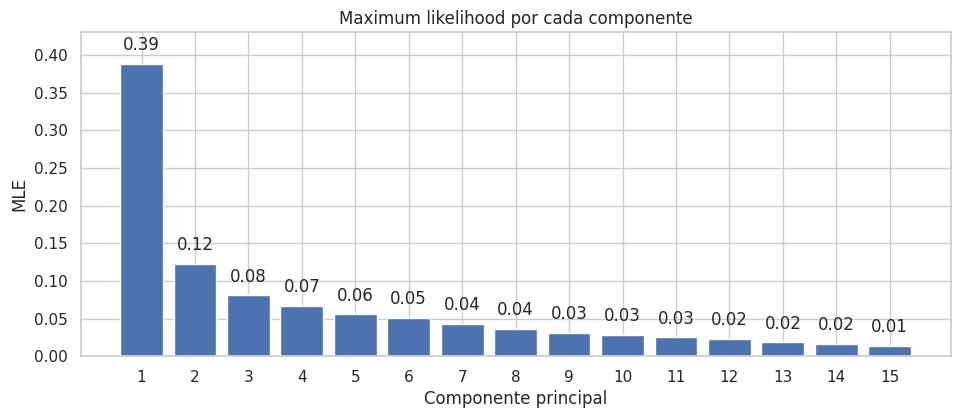

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 4))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(data.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, .43)
ax.set_title('Maximum likelihood por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('MLE')

Text(0, 0.5, 'Maximum likelihood acumulada')

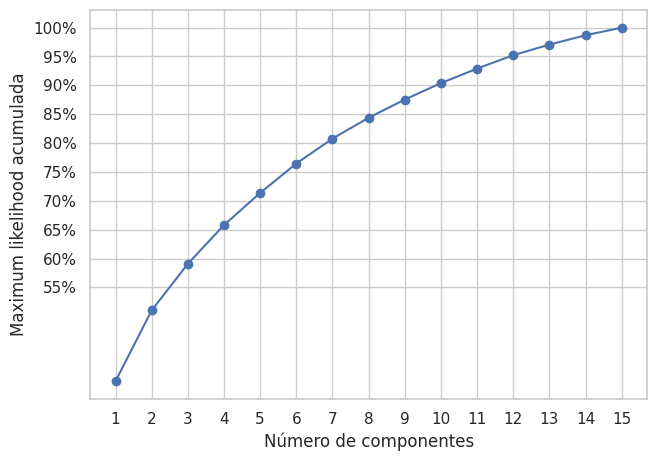

In [ ]:
plt.plot(
    range(1, len(modelo_pca.components_) + 1),
    np.cumsum(modelo_pca.explained_variance_ratio_),
    marker = "o"
)
plt.xticks(
    ticks = np.arange(data.shape[1]) + 1,
)
plt.yticks(
    ticks  = np.linspace(0.55, 1, 10),
    labels = [f"{val:0.0%}" for val in np.linspace(0.55, 1, 10)]
)
plt.xlabel('Número de componentes')
plt.ylabel('Maximum likelihood acumulada')

In [ ]:
datos_proyectados = pca_pipe.transform(data)

proyecciones = pd.DataFrame(
    datos_proyectados,
    columns = [f"PC{num + 1}" for num in range(data.shape[1])],
    index   = data.index
)
proyecciones

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
0,3.857439,1.742257,-1.628512,0.564943,1.799381,0.856906,0.184079,-1.080629,0.842437,-1.825271,-0.270299,0.772033,-0.725572,-0.231077,0.518625
1,-2.324414,-0.908082,2.208918,-0.288035,0.174514,0.712709,0.069713,0.071685,0.496486,-0.330148,-0.294802,-0.115443,-0.071957,0.059887,0.082226
2,1.942352,-0.167937,0.179089,-0.957309,0.194138,-0.578199,-0.399466,-0.855940,-0.317700,0.660519,1.849380,0.004074,-0.073287,-0.164253,-0.332423
3,-2.269756,-1.389649,0.085170,-1.002732,-1.492222,0.027979,-0.333682,-0.638350,-0.214727,-0.226879,-0.026440,-0.117164,0.099261,0.222166,0.020455
4,-0.255128,0.901009,0.268969,1.271467,-2.082110,0.234595,0.592786,-0.419143,-0.607576,-0.583973,0.166893,1.047927,-0.297426,0.283761,0.163320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,2.619913,1.470741,-0.730604,-0.151962,-0.345249,2.067898,-2.185756,0.308544,1.754289,1.527851,-1.187652,0.069661,-0.060940,-0.279980,-1.286016
2212,-1.444579,3.501660,3.805385,-0.049200,-1.493284,0.668800,0.405039,-0.775429,0.583303,-0.910987,-0.265550,0.557953,0.051649,0.213505,-0.092601
2213,1.301865,-0.806553,-0.261602,1.139269,-1.134228,-2.096632,-0.550424,-0.073045,-0.969931,0.196883,0.152825,-1.339723,0.190208,1.578352,0.465529
2214,1.982565,0.101968,1.553359,-1.464350,0.074033,0.332938,-0.130269,-0.163769,-0.372988,0.008055,0.471589,-0.431177,-0.171455,-0.347827,0.274250


In [ ]:
df_para_cluster = proyecciones.iloc[:,0:10]
df_para_cluster.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,3.857439,1.742257,-1.628512,0.564943,1.799381,0.856906,0.184079,-1.080629,0.842437,-1.825271
1,-2.324414,-0.908082,2.208918,-0.288035,0.174514,0.712709,0.069713,0.071685,0.496486,-0.330148
2,1.942352,-0.167937,0.179089,-0.957309,0.194138,-0.578199,-0.399466,-0.855940,-0.317700,0.660519
3,-2.269756,-1.389649,0.085170,-1.002732,-1.492222,0.027979,-0.333682,-0.638350,-0.214727,-0.226879
4,-0.255128,0.901009,0.268969,1.271467,-2.082110,0.234595,0.592786,-0.419143,-0.607576,-0.583973


In [ ]:
#estandarizando
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_para_cluster)

#vista de los datos
scaled_features[:5]
print(scaled_features.shape)

(2216, 10)


In [ ]:
kmeans = KMeans(
    init="random",
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=1234
)

# Esto realizará diez ejecuciones del algoritmo k -means en sus datos con un máximo de 300iteraciones por ejecución:
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=3, n_init=10, random_state=1234)

In [ ]:
print(kmeans.labels_.shape)
kmeans.labels_

(2216,)


array([2, 0, 2, ..., 2, 2, 0], dtype=int32)

In [ ]:
# El valor más bajo de SSE
print("El valor más bajo de SSE: ",kmeans.inertia_)
print("")
# Ubicaciones finales del centroide
print("Ubicaciones finales del centroide",kmeans.cluster_centers_)
print("")
# El número de iteraciones necesarias para converger
print("El número de iteraciones necesarias para converger",kmeans.n_iter_)

El valor más bajo de SSE:  18558.332425054396

Ubicaciones finales del centroide [[-0.78378726 -0.33898227 -0.12447058  0.02336141  0.20228625 -0.05679824
  -0.10656078 -0.04397533  0.14318966  0.14898512]
 [-0.08170676  1.35007017  0.39101337 -0.09596257 -0.74334597  0.50197237
   0.45876625  0.09045321 -0.78957364 -0.40919319]
 [ 1.16833081 -0.25546772 -0.03630186  0.01920973  0.11823728 -0.1942323
  -0.09917819  0.01336314  0.22832982  0.01114626]]

El número de iteraciones necesarias para converger 27


In [ ]:
data = pd.DataFrame(df_para_cluster)
data['cluster'] = kmeans.labels_
data[data['cluster'] == 1]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,cluster
4,-0.255128,0.901009,0.268969,1.271467,-2.082110,0.234595,0.592786,-0.419143,-0.607576,-0.583973,1
6,0.420641,1.776525,-0.521457,-0.551918,-0.133252,0.162122,0.910968,-0.473752,-0.279427,0.128893,1
20,3.186585,3.454476,0.210334,0.034927,-2.229473,1.924755,2.784551,1.163844,-4.116363,-10.179817,1
22,0.411651,0.099940,2.514659,-1.893993,-0.601014,-0.208806,0.035596,-1.079419,-0.417224,0.435799,1
23,-0.746263,3.702189,0.616778,0.593934,0.069429,1.247582,-0.935873,-0.585683,-0.798874,-0.459088,1
...,...,...,...,...,...,...,...,...,...,...,...
2200,-2.648003,-0.036862,2.235315,-0.528986,-0.841429,1.070284,0.813476,0.315712,0.119851,-0.312223,1
2202,-0.382054,3.805328,0.093524,0.067147,-0.659194,0.719886,0.105891,0.616262,-0.039985,-0.359809,1
2203,-0.509322,4.846004,0.180953,0.854186,-2.494114,0.155546,0.493921,-0.364875,0.142951,-0.395052,1
2204,-0.135406,1.882933,0.521079,-0.383955,-0.096684,0.553428,-0.330380,0.919850,-1.287818,0.075796,1


In [ ]:
data.groupby(['cluster']).count()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
cluster,,,,,,,,,,
0,1064,1064,1064,1064,1064,1064,1064,1064,1064,1064
1,412,412,412,412,412,412,412,412,412,412
2,740,740,740,740,740,740,740,740,740,740


In [ ]:
print(data.shape[1])

11


In [ ]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 1234,
}

# Una lista contiene los valores de SSE para cada k
sse = []
for k in range(1, data.shape[1]):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs) # el operador (**) es de desempaquetado del diccionario de Python
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

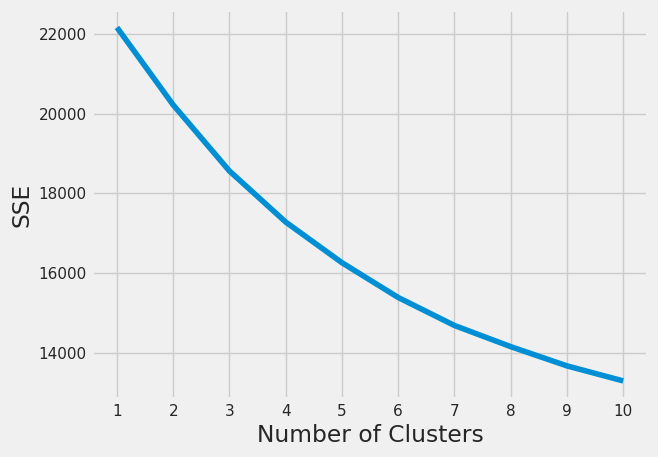

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, data.shape[1]), sse)
plt.xticks(range(1, data.shape[1]))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [ ]:
# Una lista contiene los coeficientes de silueta para cada k
silhouette_coefficients = []

# Empezamos con 2 grupos para el coeficiente de silueta
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

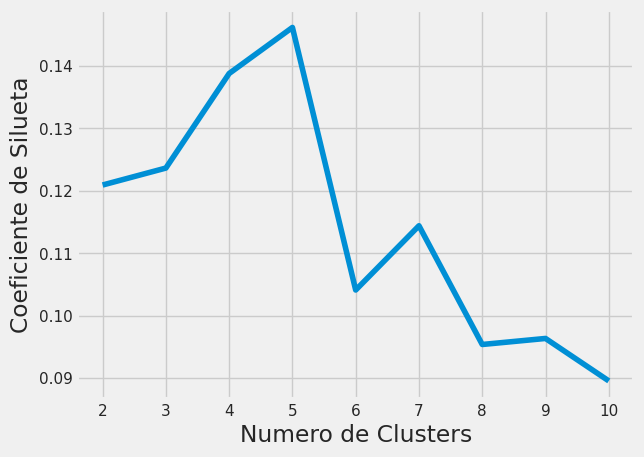

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Numero de Clusters")
plt.ylabel("Coeficiente de Silueta")
plt.show()

In [ ]:
k = 5
kmeans = KMeans(
    init="random",
    n_clusters=k,
    n_init=10,
    max_iter=300,
    random_state=1234
)

# Esto realizará diez ejecuciones del algoritmo k -means en sus datos con un máximo de 300 iteraciones por ejecución:
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=5, n_init=10, random_state=1234)

In [ ]:
kmeans.labels_

array([0, 1, 3, ..., 3, 3, 1], dtype=int32)

In [ ]:
# El valor más bajo de SSE
print("El valor más bajo de SSE: ",kmeans.inertia_)
print("")
# Ubicaciones finales del centroide
print("Ubicaciones finales del centroide",kmeans.cluster_centers_)
print("")
# El número de iteraciones necesarias para converger
print("El número de iteraciones necesarias para converger",kmeans.n_iter_)

El valor más bajo de SSE:  16258.654764970499

Ubicaciones finales del centroide [[ 1.34144163 -0.39122728 -0.42175789  0.07665265  0.07977223  0.73500118
   0.80389343 -0.86496141  0.46860933  0.37974967]
 [-0.83321191 -0.38559722 -0.115474    0.05871149  0.18361287 -0.03204979
  -0.02482384 -0.02237353  0.12569403  0.10667424]
 [ 0.98769228  0.23278392 -0.36184837 -0.00929794  0.08882123  0.81767402
  -1.76541125  1.08606212  0.16383589  0.02279776]
 [ 0.75466892  0.03846484  0.41908333 -0.08905763  0.01507794 -1.16667339
  -0.04408873  0.0319187  -0.09795003 -0.06232149]
 [-0.25190511  1.55263634  0.43250127 -0.13954426 -0.83256759  0.65067651
   0.65008012  0.09764067 -0.88471498 -0.68121891]]

El número de iteraciones necesarias para converger 22


In [ ]:
data = pd.DataFrame(df_para_cluster)
data['cluster'] = kmeans.labels_

In [ ]:
data.groupby(['cluster']).count()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
cluster,,,,,,,,,,
0,278,278,278,278,278,278,278,278,278,278
1,1009,1009,1009,1009,1009,1009,1009,1009,1009,1009
2,204,204,204,204,204,204,204,204,204,204
3,446,446,446,446,446,446,446,446,446,446
4,279,279,279,279,279,279,279,279,279,279


In [ ]:
print(scaled_features)
print(scaled_features.shape)
data_scaled_features = pd.DataFrame(scaled_features)

# Obtenemos los centroides de cada cluster en términos de las variables originales
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
df_centroids = pd.DataFrame(centroids, columns=data_scaled_features.columns)

# Imprimimos los centroides de cada cluster
print(df_centroids)
print(df_centroids.shape)

[[ 1.58287085  0.99253971 -1.49637233 ... -1.41024255  1.20411607
  -2.27039689]
 [-0.98059165 -0.6764362   1.97133763 ...  0.08176058  0.73039536
  -0.34828074]
 [ 0.78873116 -0.21035081  0.13707391 ... -1.11931731 -0.38449396
   0.92531188]
 ...
 [ 0.52313694 -0.61250121 -0.2611578  ... -0.10563472 -1.27761401
   0.32926572]
 [ 0.80540632 -0.04038547  1.37893937 ... -0.2231023  -0.46020193
   0.08651086]
 [-0.77026889  0.76401777  0.58018332 ...  0.86131606  0.43589427
   0.12906611]]
(2216, 10)
          0         1         2         3         4         5         6  \
0  3.275227 -0.455170 -0.439325  0.066087  0.021743  0.710809  0.704005   
1 -1.969004 -0.446229 -0.100386  0.048091  0.120350  0.015910 -0.004754   
2  2.422152  0.535762 -0.373028 -0.020128  0.030336  0.785705 -1.493387   
3  1.860210  0.227183  0.491165 -0.100134 -0.039690 -1.011988 -0.021230   
4 -0.567168  2.631692  0.506014 -0.150776 -0.844614  0.634416  0.572456   

          7         8         9  
0 -0.659494 

Los centroides representan el valor promedio de cada variable en cada uno de los tres clusters. La interpretación de cada uno de ellos puede variar dependiendo del contexto.